In [1]:
!pip install --upgrade pandas-datareader

     |█████████▏                      | 30 kB 1.7 MB/s eta 0:00:01

     |████████████████████████████████| 107 kB 1.9 MB/s 


     |▌                               | 71 kB 24.1 MB/s eta 0:00:01

     |███▌                            | 501 kB 20.6 MB/s eta 0:00:01

     |██████████▊                     | 1.5 MB 20.6 MB/s eta 0:00:01

     |████████████████████▏           | 2.9 MB 20.6 MB/s eta 0:00:01

     |███████████████████████████████▌| 4.5 MB 20.6 MB/s eta 0:00:01

     |████████████████████████████████| 4.5 MB 20.6 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [3]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -2.231774
1   -0.790807
2   -0.105463
3    1.741369
Name: daily returns, dtype: float64

In [4]:
s * 100

0   -223.177430
1    -79.080732
2    -10.546285
3    174.136875
Name: daily returns, dtype: float64

In [5]:
np.abs(s)

0    2.231774
1    0.790807
2    0.105463
3    1.741369
Name: daily returns, dtype: float64

In [6]:
s.describe()

count    4.000000
mean    -0.346669
std      1.650148
min     -2.231774
25%     -1.151049
50%     -0.448135
75%      0.356245
max      1.741369
Name: daily returns, dtype: float64

In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -2.231774
AAPL   -0.790807
MSFT   -0.105463
GOOG    1.741369
Name: daily returns, dtype: float64

In [8]:
s['AMZN']

-2.231774303382775

In [9]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.790807
MSFT   -0.105463
GOOG    1.741369
Name: daily returns, dtype: float64

In [10]:
'AAPL' in s

True

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [12]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [13]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [14]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [15]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [16]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [17]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [18]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [19]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [20]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [21]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


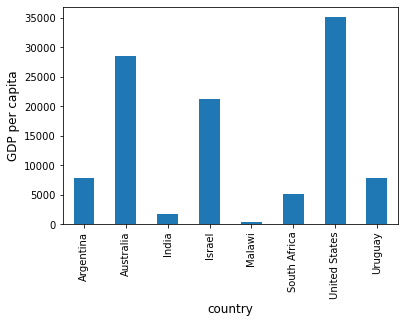

In [22]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [23]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


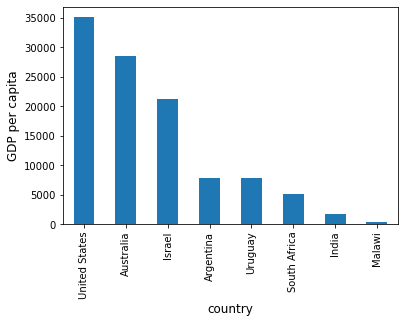

In [24]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [25]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [26]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [27]:
source[1]

'1948-01-01,3.4\r'

In [28]:
source[2]

'1948-02-01,3.8\r'

In [29]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [32]:
pd.set_option('precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,867.0
mean,5.7
std,1.6
min,2.5
25%,4.5
50%,5.5
75%,6.8
max,10.8


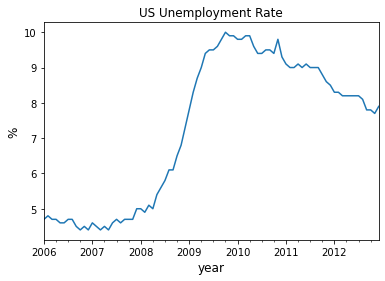

In [33]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

/Users/phil/a50037/envs/ebp/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


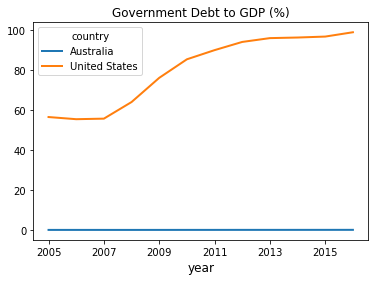

In [34]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

In [35]:
import datetime as dt 
from pandas_datareader import data

In [36]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [37]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)): 
    """
    This function reads in closing price data from Yahoo 
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

In [38]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [39]:
p1 = ticker.iloc[0]    #Get the first set of prices as a Series
p2 = ticker.iloc[-1]   #Get the last set of prices as a Series
price_change = (p2 - p1) / p1 * 100
price_change

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
AAPL    85.9
AMZN    20.1
BA       0.6
QCOM    53.7
KO      17.9
GOOG    27.8
SNE     39.6
PTR    -17.4
dtype: float64

In [40]:
change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = change.iloc[-1]
price_change

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
AAPL    85.9
AMZN    20.1
BA       0.6
QCOM    53.7
KO      17.9
GOOG    27.8
SNE     39.6
PTR    -17.4
Name: 2019-12-31 00:00:00, dtype: float64

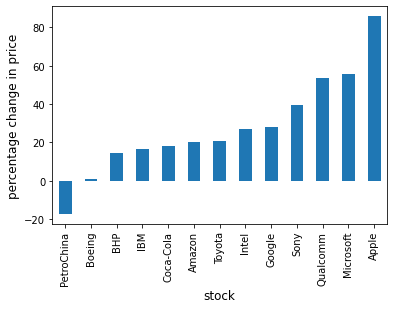

In [41]:
price_change.sort_values(inplace=True)
price_change = price_change.rename(index=ticker_list)
fig, ax = plt.subplots()
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()

In [42]:
from myst_nb import glue
glue("pandas_share_prices", fig, display=False)

In [43]:
indices_data = read_data(
        indices_list,
        start=dt.datetime(1928, 1, 2),
        end=dt.datetime(2020, 12, 31)
)

In [44]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first()  # Get the first set of returns as a DataFrame
    p2 = indices_data.groupby(indices_data.index.year)[index].last()   # Get the last set of returns as a DataFrame
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns

yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1928,3.7e-01,NaN,NaN,NaN
1929,-1.4e-01,NaN,NaN,NaN
1930,-2.8e-01,NaN,NaN,NaN
1931,-4.9e-01,NaN,NaN,NaN
1932,-8.5e-02,NaN,NaN,NaN
...,...,...,...,...
2016,1.1e-01,9.8e-02,1.5e-01,3.6e-02
2017,1.8e-01,2.7e-01,2.4e-01,1.6e-01
2018,-7.0e-02,-5.3e-02,-6.0e-02,-1.5e-01


In [45]:
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,9.3e+01,5.0e+01,3.6e+01,5.6e+01
mean,7.3e-02,1.2e-01,9.0e-02,7.5e-02
std,1.9e-01,2.5e-01,1.5e-01,2.4e-01
min,-4.9e-01,-4.0e-01,-3.3e-01,-4.0e-01
25%,-6.5e-02,-3.0e-02,4.2e-03,-1.0e-01
50%,9.9e-02,1.4e-01,8.9e-02,7.5e-02
75%,2.0e-01,2.7e-01,2.2e-01,2.1e-01
max,4.6e-01,8.4e-01,3.3e-01,9.2e-01


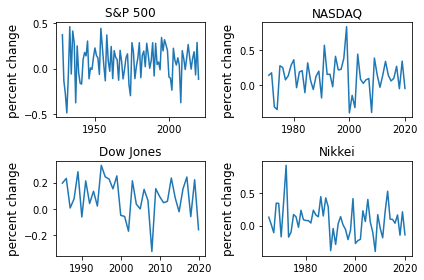

In [46]:
fig, axes = plt.subplots(2, 2)

for iter_, ax in enumerate(axes.flatten()):            # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iter_]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout() 

In [47]:
from myst_nb import glue
glue("pandas_indices_pctchange", fig, display=False)